<a href="https://colab.research.google.com/github/mojahid-t17/Machine-Learning/blob/main/5_2_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
#import dataset:
# Sample dataset (Salary vs Experience)
data = {
    "YearsExperience": [1.1, 2.3, 3.3, 4.5, 5.1, 6.3, 7.4, 8.5, 9.6, 10.3],
    "Salary": [39343, 46205, 60150, 61111, 66029, 81363, 91738, 100000, 105000, 112000]
}

df = pd.DataFrame(data)
print(df.head())


   YearsExperience  Salary
0              1.1   39343
1              2.3   46205
2              3.3   60150
3              4.5   61111
4              5.1   66029


Text(0.5, 1.0, 'Salary vs Years of Experience')

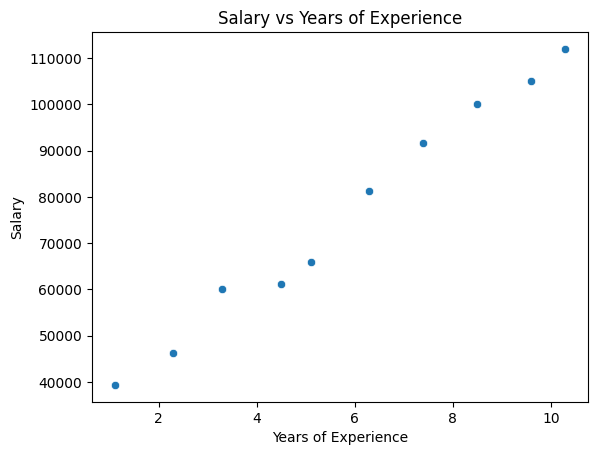

In [ ]:
#ploting the data
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")

In [ ]:
#  Prepare Data for Training
X = df[["YearsExperience"]]
y = df["Salary"]  # Dependent variable (1D array)

In [ ]:
# Split Data into Training & Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
# Train the Linear Regression Model
# Initialize the model
regressor = LinearRegression()

# Train (fit) the model
regressor.fit(X_train, Y_train)

# Print the coefficient (slope) and intercept
print(f"Slope (w): {regressor.coef_[0]}")
print(f"Intercept (b): {regressor.intercept_}")




Slope (w): 7919.300658122618
Intercept (b): 30852.58330446831


In [ ]:
# Predict salaries for test data
y_pred = regressor.predict(X_test)

# Compare actual vs predicted values
predictions_df = pd.DataFrame({"Actual": Y_test, "Predicted": y_pred})
print(predictions_df)


   Actual     Predicted
4   66029  71241.016661
1   46205  49066.974818


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Evaluate Model Performance
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}") #y^ -yi
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 4036.9957395219935
Mean Squared Error (MSE): 17678008.76657984
Root Mean Squared Error (RMSE): 4204.522418370467
R² Score: 0.8200670260013315


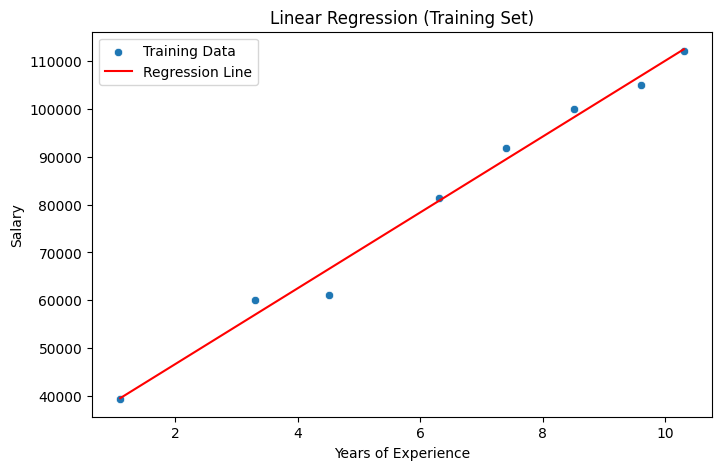

In [ ]:
# Plot training data with regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train["YearsExperience"], y=Y_train, label="Training Data")
sns.lineplot(x=X_train["YearsExperience"], y=regressor.predict(X_train), color='red', label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression (Training Set)")
plt.legend()
plt.show()


In [ ]:
new_experience = np.array([[7.5]])  # Reshape to 2D
predicted_salary = regressor.predict(new_experience)

print(f"Predicted Salary for 7.5 years experience: ${predicted_salary[0]:.2f}")


Predicted Salary for 7.5 years experience: $90247.34


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Evaluation
R2 represents the percentage of variance in our response variable (y) that is explained by our model. That means in our case; the percentage of variance in y that can be explained by a variance in x.


*   0% indicates that the model explains none of the variability of the response data around its mean.
*  100% indicates that the model explains all the variability of the response data around its mean.



In [ ]:
# Variational Measure / accuracy for regression:
from sklearn.metrics import r2_score
R2_score= r2_score(y,regressor.predict(X))
R2_score

0.9849803101078151

In [ ]:
print('The R2 score of the model on the test set is:', regressor.score(X, y))

The R2 score of the model on the test set is: 0.9849803101078151


In [ ]:
# Mean Absolute Error   |yi-y_hat|
# the MAE is the average difference over the predicted and actual target values.
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(X,y)
mae



76288.06

In [ ]:
#  Mean Squared Error (yi- h_hat)^2
# the mse s the average squared difference over the predicted and actual target values.
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(X,y)
mse

6398965249.9